<h3> Function to calculate Balassa index of patent radicality </h3>

<p> Matt Wilder, University of Toronto <br>
Please address questions and comments to <a href="mailto:matt.wilder@utoronto.ca">matt.wilder@utoronto.ca</a>. </p>

<p>Updated 18 July 2024</p>

This function calculates the Balassa Index of patent radicality, as used as a measure of revealed comparative advantage (RCA) in Meelen et al (2017) 'Disentangling patterns of economic, technological and innovative specialization of Western economies: An assessment of the Varieties-of-Capitalism theory on comparative institutional advantages' <i>Research Policy, 46</i>(3): 667-77.

The Radicality Index (RI) is defined as follows:<br><br>
$$
\large RI_{ijt} = \frac{\frac{Y_{ijt}^*}{Y_{ijt} + Y_{ijt}^*}}{\frac{\sum_{i=1}^{n} Y_{ijt}^*}{\sum_{i=1}^{n} (Y_{ijt} + Y_{ijt}^*)}}
$$

where:
- $RI_{ijt}$ is the Radicality Index for country $i$ in sector $j$ at time $t$.
- $Y^*_{ijt}$ denotes the number of radical patents for country $i$ in sector $j$ at time $t$.
- $Y_{ijt}$ refers to the number of non-radical patents of country $i$ in sector $j$ at time $t$.
- The denominator is the ratio of the sum of radical patents across all countries to the sum of total patents across all countries in sector $j$ at time $t$. 


This index captures the relative specialization of countries in radical innovation within specific sectors. Technically, the range of the variable is 0 to $\infty$. Conventional interpretation is as follows:
<ul>
<li>RI > 1: the country has a revealed comparative advantage in the sector. </li>
<li>RI < 1: the country has a revealed comparative disadvantage in the sector.</li>
</ul>


Meelan et al (2017) normalize the distrubution between -1 and 1, whereby values below zero signify a comparative disadvantage, while values above zero signify a comparative advantage. 

$$
\normalsize RI' = \frac{RI - 1}{RI + 1}
$$

<ul>
<li>RI' > 0: the country has a revealed comparative advantage in the sector. </li>
<li>RI' < 0: the country has a revealed comparative disadvantage in the sector. </li>
</ul>


In [5]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import requests
from io import BytesIO
import zipfile
import ast

# data_dir = 'E:/DATA/USPTO/'
# df = pd.read_csv(data_dir+'forward_citations_with_cpc_classifications_crude_location.csv',sep='\t', dtype=str) # full dataset, load the data in with dtype = str to conserve memory
# df = pd.read_csv('https://raw.githubusercontent.com/matt-wilder/patent-research/main/forward_citations_with_cpc_classifications_sample.csv',sep='\t', dtype='str')

'''load in the sample data (this may take a few minutes if the connection is slow)'''

url = 'https://raw.githubusercontent.com/matt-wilder/patent-research/main/ES_forward_citations_with_cpc_classifications_crude_location.zip'

# download the zip file
response = requests.get(url)
zip_file = zipfile.ZipFile(BytesIO(response.content))

# extract the CSV file from the zip archive
csv_filename = zip_file.namelist()[0]  # Assumes there is only one file in the zip archive
with zip_file.open(csv_filename) as csvfile:
    df = pd.read_csv(csvfile, sep='\t', dtype=str)
    
df

,patent,name,date,year,forward_citations,generality_hhi,patent_cpcs,country,VoC
0,9495936,Norquist,2016-11-01,2016,1.0,0.0,G06F|G09G|H04N,US,LME
1,9458989,Hsu et al.,2016-10-01,2016,3.0,0.86,F21V|B82Y|G09F|G02F|G02B|G03B|Y10S|F21V|B82Y|G...,US,LME
2,9437131,Nagara,2016-09-01,2016,2.0,0.83,G09G|G09G|G09G|G09G|G09G|G09G,US,LME
3,9389497,Yang,2016-07-01,2016,1.0,0.0,G03B|H04M|H04N,CN,other
4,9373290,Lee,2016-06-01,2016,3.0,0.62,G02F|G09G|G02F|G09G|G02F|G09G|G02F|G09G,TW,other
...,...,...,...,...,...,...,...,...,...
316325,8934498,Kotecha,2015-01-01,2015,1.0,0.0,H04W|H04L,US,LME
316326,8938875,Miyazaki,2015-01-01,2015,1.0,0.5,H01G|Y10T|H01G|Y10T,JP,CME
316327,8941864,Hirohata,2015-01-01,2015,1.0,0.0,G06K|H04N,JP,CME
316328,8933918,Furuta et al.,2015-01-01,2015,1.0,0.0,G09G,JP,CME


In [8]:
'''remove rows where country equals "un" '''

df = df.loc[df['country'] != 'un'].reset_index(drop=True)

print(df.shape)
print(df['country'].unique())

(316296, 9)
['US' 'CN' 'TW' 'KR' 'DE' 'NZ' 'JP' 'FR' 'IT' 'HK' 'ES' 'LU' 'NL' 'CA'
 'SE' 'FI' 'GB' 'CH' 'IE' 'SG' 'BB' 'KY' 'NO' 'IL' 'BE' 'IN' 'AT' 'LI'
 'PT' 'SA' 'DK' 'CZ' 'AU' 'GI' 'IS' 'ZA' 'PL' 'CK' 'TH' 'MT' 'BR' 'BM'
 'VG' 'HU' 'AD' 'BS' 'AE' 'TR' 'CY' 'EE' 'RU' 'JE' 'OM' 'SC' 'IM' 'MO'
 'MU' 'MX' 'IR' 'LV' 'QA' 'GR' 'SK' 'AR' 'MY' 'SI' 'LT' 'CO' 'WS' 'CL'
 'HR' 'BZ' 'PH' 'KW' 'NG' 'LB' 'BG' 'EG' 'NE' 'YE' 'JO' 'MH' 'VC' 'LK'
 'VN' 'CU' 'UA' 'RO' 'PE' 'TN' 'PK' 'CR' 'ID' 'TC' 'BN' 'KN' 'TT' 'MA'
 'PA' 'TK' 'SM']


In [9]:
''' replace country DT with DE, and JA with JP for consistency '''

df['country'] = df['country'].replace('DT', 'DE')
df['country'] = df['country'].replace('JA', 'JP')

In [11]:
'''add entrepreneurial state indicator (2018)'''

es_dict = {
    'AU': 'NA', 'CA': 'NA', 'GB': 3.471, 'IE': 2.127, 'NZ': 'NA', 'LV': 2.219,
    'US': 4.219, 'AT': 3.739, 'BE': 3.299, 'CH': 3.191, 'DE': 4.578, 'DK': 4.497,
    'FI': 4.865, 'JP': 2.898, 'KR': 3.874, 'NL': 3.542, 'NO': 4.682, 'SK': 1.787,
    'SE': 4.483, 'PT': 2.151, 'ES': 'NA', 'FR': 3.826, 'IT': 2.035, 'GR': 2.883,
    'PL': 2.247, 'LT': 2.406, 'CL': 2.471, 'CZ': 2.506, 'CO': 2.535, 'SI': 2.582,
    'HU': 2.659, 'IL': 2.727, 'EE': 2.865, 'GR': 2.883, 'LU': 3.400}


# create 'ES' column
df['ES'] = df['country'].map(lambda x: es_dict.get(x, 'NA'))

df

,patent,name,date,year,forward_citations,generality_hhi,patent_cpcs,country,VoC,ES
0,9495936,Norquist,2016-11-01,2016,1.0,0.0,G06F|G09G|H04N,US,LME,4.219
1,9458989,Hsu et al.,2016-10-01,2016,3.0,0.86,F21V|B82Y|G09F|G02F|G02B|G03B|Y10S|F21V|B82Y|G...,US,LME,4.219
2,9437131,Nagara,2016-09-01,2016,2.0,0.83,G09G|G09G|G09G|G09G|G09G|G09G,US,LME,4.219
3,9389497,Yang,2016-07-01,2016,1.0,0.0,G03B|H04M|H04N,CN,other,NA
4,9373290,Lee,2016-06-01,2016,3.0,0.62,G02F|G09G|G02F|G09G|G02F|G09G|G02F|G09G,TW,other,NA
...,...,...,...,...,...,...,...,...,...,...
316291,8934498,Kotecha,2015-01-01,2015,1.0,0.0,H04W|H04L,US,LME,4.219
316292,8938875,Miyazaki,2015-01-01,2015,1.0,0.5,H01G|Y10T|H01G|Y10T,JP,CME,2.898
316293,8941864,Hirohata,2015-01-01,2015,1.0,0.0,G06K|H04N,JP,CME,2.898
316294,8933918,Furuta et al.,2015-01-01,2015,1.0,0.0,G09G,JP,CME,2.898


In [12]:
''' define the tech class '''

'''by the section codes (8 unique in this dataset)'''
df['tech_class'] = df['patent_cpcs'].str.split('|').str[0].str[0]

# A - Human Necessities (e.g., Health, Food)
# B - Performing Operations; Transporting (e.g., Manufacturing, Vehicles)
# C - Chemistry; Metallurgy (e.g., Chemicals, Alloys)
# D - Textiles; Paper (e.g., Fabrics, Papermaking)
# E - Fixed Constructions (e.g., Buildings, Infrastructure)
# F - Mechanical Engineering; Lighting; Heating; Weapons; Blasting (e.g., Machines, HVAC)
# G - Physics (e.g., Optics, Instruments)
# H - Electricity (e.g., Circuits, Communications)

'''or by the classification codes (82 unqiue classes in this dataset)'''
# df['tech_class'] = df['patent_cpcs'].str.split('|').str[0].str[:3]

'''or using fractional counting'''
def process_patent(row):
    if pd.notna(row['patent_cpcs']):  # check if 'patent_cpcs' is not NaN
        cpcs = row['patent_cpcs'].split('|')

        # count occurrences of each CPC
        cpc_counts = {}
        for cpc in set(cpcs):
            cpc_counts[cpc] = cpcs.count(cpc)

        # calculate fractional contributions for each CPC, rounding to two decimal places
        total_cpcs = len(cpcs)
        cpc_contributions = {cpc: round(count / total_cpcs, 2) for cpc, count in cpc_counts.items()}

        return cpc_contributions
    else:
        return {}
df['frac_class'] = df.apply(process_patent, axis=1)

df

,patent,name,date,year,forward_citations,generality_hhi,patent_cpcs,country,VoC,ES,tech_class,frac_class
0,9495936,Norquist,2016-11-01,2016,1.0,0.0,G06F|G09G|H04N,US,LME,4.219,G,"{'H04N': 0.33, 'G09G': 0.33, 'G06F': 0.33}"
1,9458989,Hsu et al.,2016-10-01,2016,3.0,0.86,F21V|B82Y|G09F|G02F|G02B|G03B|Y10S|F21V|B82Y|G...,US,LME,4.219,F,"{'B82Y': 0.14, 'G09F': 0.14, 'Y10S': 0.14, 'F2..."
2,9437131,Nagara,2016-09-01,2016,2.0,0.83,G09G|G09G|G09G|G09G|G09G|G09G,US,LME,4.219,G,{'G09G': 1.0}
3,9389497,Yang,2016-07-01,2016,1.0,0.0,G03B|H04M|H04N,CN,other,NA,G,"{'H04N': 0.33, 'G03B': 0.33, 'H04M': 0.33}"
4,9373290,Lee,2016-06-01,2016,3.0,0.62,G02F|G09G|G02F|G09G|G02F|G09G|G02F|G09G,TW,other,NA,G,"{'G02F': 0.5, 'G09G': 0.5}"
...,...,...,...,...,...,...,...,...,...,...,...,...
316291,8934498,Kotecha,2015-01-01,2015,1.0,0.0,H04W|H04L,US,LME,4.219,H,"{'H04W': 0.5, 'H04L': 0.5}"
316292,8938875,Miyazaki,2015-01-01,2015,1.0,0.5,H01G|Y10T|H01G|Y10T,JP,CME,2.898,H,"{'Y10T': 0.5, 'H01G': 0.5}"
316293,8941864,Hirohata,2015-01-01,2015,1.0,0.0,G06K|H04N,JP,CME,2.898,G,"{'G06K': 0.5, 'H04N': 0.5}"
316294,8933918,Furuta et al.,2015-01-01,2015,1.0,0.0,G09G,JP,CME,2.898,G,{'G09G': 1.0}


In [13]:
'''calculate radicality measure'''

# function to calculate deciles for radicality measures by tech class and time period (window based on the number of patents required to populate a decile distribution, per "window_" variables)
def calculate_deciles_for_patents(df, indicators, year_column='year', tech_class_column='tech_class'): #tech class based on first listed tech class, not fractional count
    # ensure df has a unique index
    df.reset_index(inplace=True, drop=True)
    
    # store the decile and time frame ('window') information for each indicator
    deciles_info = pd.DataFrame(index=df.index)

    # iterate over each indicator, calculating deciles and windows separately
    for indicator in indicators:
        # initialize a list to store windows for each indicator
        deciles_info[f'window_{indicator}'] = pd.NA
        
        # filter out NaNs and values < 0
        indicator_df = df.dropna(subset=[indicator])
        indicator_df = indicator_df[indicator_df[indicator] > 0]

        # ensure year is treated as integer
        indicator_df[year_column] = indicator_df[year_column].astype(int)

        # group by tech class and sort unique years within each tech class for each indicator
        for tech_class, group in indicator_df.groupby(tech_class_column):
            years = sorted(group[year_column].unique())
            grouped_years = []

            # process each year within the tech class
            for year in years:
                if year not in grouped_years:
                    current_group = [year]
                    while True:
                        temp_df = group[group[year_column].isin(current_group)].copy()
                        if len(temp_df) >= 10 or (min(current_group) == min(years) and max(current_group) == max(years)):
                            window = f"{min(current_group)} - {max(current_group)}"
                            grouped_years.extend(current_group)
                            
                            # calculate deciles for the current group
                            decile_label = f'{indicator}_decile'
                            temp_df[decile_label] = pd.qcut(temp_df[indicator].rank(method='first'), 10, labels=range(1, 11), duplicates='drop')
                            temp_df[f'window_{indicator}'] = window  # Create the column to store the window information
                            
                            # update the deciles_info df with decile and window info
                            deciles_info.loc[temp_df.index, decile_label] = temp_df[decile_label]
                            deciles_info.loc[temp_df.index, f'window_{indicator}'] = window
                            
                            break
                        else:
                            if min(current_group) > min(years):
                                current_group.insert(0, min(current_group) - 1)
                            if max(current_group) < max(years):
                                current_group.append(max(current_group) + 1)
                            if min(current_group) <= min(years) and max(current_group) >= max(years):
                                break

    # concatenate the original df with the deciles_info df
    result_df = pd.concat([df, deciles_info], axis=1)

    return result_df

indicators = ['forward_citations', 'generality_hhi']  # these indicators need to be converted to numeric for the calculation to work
df[['forward_citations', 'generality_hhi']] = df[['forward_citations', 'generality_hhi']].apply(pd.to_numeric, errors='coerce')

df = calculate_deciles_for_patents(df, indicators) # note the OR statement and decile specification; set these as desired
df['is_radical'] = ((df['forward_citations_decile'] == 10)).astype(int)

df

,patent,name,date,year,forward_citations,generality_hhi,patent_cpcs,country,VoC,ES,tech_class,frac_class,window_forward_citations,forward_citations_decile,window_generality_hhi,generality_hhi_decile,is_radical
0,9495936,Norquist,2016-11-01,2016,1.0,0.00,G06F|G09G|H04N,US,LME,4.219,G,"{'H04N': 0.33, 'G09G': 0.33, 'G06F': 0.33}",2016 - 2016,1,<NA>,NaN,0
1,9458989,Hsu et al.,2016-10-01,2016,3.0,0.86,F21V|B82Y|G09F|G02F|G02B|G03B|Y10S|F21V|B82Y|G...,US,LME,4.219,F,"{'B82Y': 0.14, 'G09F': 0.14, 'Y10S': 0.14, 'F2...",2016 - 2016,8,2016 - 2016,10,0
2,9437131,Nagara,2016-09-01,2016,2.0,0.83,G09G|G09G|G09G|G09G|G09G|G09G,US,LME,4.219,G,{'G09G': 1.0},2016 - 2016,5,2016 - 2016,9,0
3,9389497,Yang,2016-07-01,2016,1.0,0.00,G03B|H04M|H04N,CN,other,NA,G,"{'H04N': 0.33, 'G03B': 0.33, 'H04M': 0.33}",2016 - 2016,1,<NA>,NaN,0
4,9373290,Lee,2016-06-01,2016,3.0,0.62,G02F|G09G|G02F|G09G|G02F|G09G|G02F|G09G,TW,other,NA,G,"{'G02F': 0.5, 'G09G': 0.5}",2016 - 2016,7,2016 - 2016,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316291,8934498,Kotecha,2015-01-01,2015,1.0,0.00,H04W|H04L,US,LME,4.219,H,"{'H04W': 0.5, 'H04L': 0.5}",2015 - 2015,5,<NA>,NaN,0
316292,8938875,Miyazaki,2015-01-01,2015,1.0,0.50,H01G|Y10T|H01G|Y10T,JP,CME,2.898,H,"{'Y10T': 0.5, 'H01G': 0.5}",2015 - 2015,5,2015 - 2015,4,0
316293,8941864,Hirohata,2015-01-01,2015,1.0,0.00,G06K|H04N,JP,CME,2.898,G,"{'G06K': 0.5, 'H04N': 0.5}",2015 - 2015,5,<NA>,NaN,0
316294,8933918,Furuta et al.,2015-01-01,2015,1.0,0.00,G09G,JP,CME,2.898,G,{'G09G': 1.0},2015 - 2015,5,<NA>,NaN,0


In [14]:
print(df['is_radical'].value_counts())

conditional_distribution = df.groupby('window_forward_citations')['is_radical'].value_counts()
print(conditional_distribution)


is_radical
0    289903
1     26393
Name: count, dtype: int64
window_forward_citations  is_radical
2015 - 2015               0             88349
                          1              9820
2016 - 2016               0             71187
                          1              7913
2017 - 2017               0             54609
                          1              6070
2018 - 2018               0             21852
                          1              2430
2018 - 2019               0               257
                          1                29
2019 - 2019               0              1172
                          1               131
Name: count, dtype: int64


<h3>Crude Balassa index of innovation advantage</h3>
<br>
$$
\large RI_{ijt} = \frac{\frac{Y_{ijt}^*}{Y_{ijt} + Y_{ijt}^*}}{\frac{\sum_{i=1}^{n} Y_{ijt}^*}{\sum_{i=1}^{n} (Y_{ijt} + Y_{ijt}^*)}}
$$

$Y^*_{ijt}$ = number of 10<sup>th</sup> decile patents in country $i$ in tech class $j$ in year $t$.<br>
$Y_{ijt}$ = number of all other patents in country $i$ in tech class $j$ in year $t$. <br>
The denominator is the ratio of the sum of radical patents across all countries to the sum of total patents across all countries in sector $j$ at time $t$.


In [15]:
# Calculate a Radicality (Balassa) Index for each country i in tech class j at time t

# Step 1: aggregate data
aggregated_data = df.groupby(['country', 'tech_class', 'year', 'is_radical']).size().unstack(fill_value=0)
aggregated_data.reset_index(inplace=True)
aggregated_data.rename(columns={0: 'non_radical_patents', 1: 'radical_patents'}, inplace=True)

# Step 2: calculate the RI numerator for each country, tech class, and year
aggregated_data['numerator'] = aggregated_data['radical_patents'] / (aggregated_data['non_radical_patents'] + aggregated_data['radical_patents'])

# Step 3: calculate the RI denominator
# Sum of radical patents across all countries
total_radical_patents = aggregated_data.groupby(['tech_class', 'year'])['radical_patents'].sum()
# Sum of total patents across all countries
total_patents = aggregated_data.groupby(['tech_class', 'year']).apply(lambda x: (x['non_radical_patents'] + x['radical_patents']).sum())

# Ratio of the sums for the denominator
ri_denominator = total_radical_patents / total_patents

# Map the calculated denominator back to the aggregated data
aggregated_data['denominator'] = aggregated_data.apply(
    lambda row: ri_denominator.get((row['tech_class'], row['year'])), axis=1
)

# Ensure the denominator is never zero or NaN (replace 0 with a very small number, e.g., 1e-10, to avoid division by zero)
aggregated_data['denominator'] = aggregated_data['denominator'].replace(0, 1e-10)

# Step 4: compute RI
aggregated_data['RI'] = aggregated_data['numerator'] / aggregated_data['denominator']

# Step 5: normalize RI using the transformation formula
aggregated_data['RI_normalized'] = (aggregated_data['RI'] - 1) / (aggregated_data['RI'] + 1)

# Display the data frame of Rijt values (RI for each country, tech class, and year)
crude_balassa_df = aggregated_data

# Optional: Display only cases of comparative advantage
# crude_balassa_df = crude_balassa_df[crude_balassa_df['RI_normalized'] > 0]

crude_balassa_df


is_radical,country,tech_class,year,non_radical_patents,radical_patents,numerator,denominator,RI,RI_normalized
0,AD,B,2018,1,0,0.0,0.100206,0.000000,-1.000000
1,AD,G,2016,1,0,0.0,0.099996,0.000000,-1.000000
2,AE,A,2017,0,1,1.0,0.100075,9.992516,0.818058
3,AE,A,2018,1,0,0.0,0.099978,0.000000,-1.000000
4,AE,B,2015,1,0,0.0,0.100000,0.000000,-1.000000
...,...,...,...,...,...,...,...,...,...
1615,ZA,G,2017,3,0,0.0,0.100005,0.000000,-1.000000
1616,ZA,G,2018,1,0,0.0,0.100097,0.000000,-1.000000
1617,ZA,H,2015,1,0,0.0,0.100032,0.000000,-1.000000
1618,ZA,H,2016,1,0,0.0,0.100006,0.000000,-1.000000


In [16]:
print(crude_balassa_df['RI'].value_counts())
print(crude_balassa_df['RI_normalized'].value_counts())

RI
0.000000     885
1.249081       3
2.500000       3
10.000000      3
1.250000       3
            ... 
0.368098       1
0.792020       1
0.495910       1
0.296667       1
3.332282       1
Name: count, Length: 677, dtype: int64
RI_normalized
-1.000000    885
 0.110748      3
 0.428571      3
 0.818182      3
 0.111111      3
            ... 
-0.461883      1
-0.116059      1
-0.336979      1
-0.542417      1
 0.538350      1
Name: count, Length: 677, dtype: int64


<h3>Using Fractional Counts to Calculate a Balassa Index of Innovation Advantage</h3>

Fractional counts accommodate patents that may be associated with multiple countries and/or technological classes. The approach proportionally distributes each patent's contribution across its associated categories.

Define:
- $f^*_{ijt}$ as the sum of the products of country and CPC class contributions for the radical patents ($R$) for country $i$ in technology class $j$ at time $t$.
- $f_{ijt}$ similarly for non-radical patents ($N$).

The fractional contributions for radical and non-radical patents are calculated as:

$$
f^*_{ijt} = \sum_{p \in R} \left( c_{ip} \times d_{jp} \right)
$$
$$
f_{ijt} = \sum_{p \in N} \left( c_{ip} \times d_{jp} \right)
$$

where $c_{ip}$ denotes the fractional contribution of patent $p$ to country $i$, and $d_{jp}$ denotes the fractional contribution of patent $p$ to CPC class $j$.

The Radicality Index (RI) is then calculated as: 
<br>
$$
\large RI_{ijt} = \frac{\frac{f_{ijt}^*}{f_{ijt} + f_{ijt}^*}}{\frac{\sum_{i=1}^{n} f_{ijt}^*}{\sum_{i=1}^{n} (f_{ijt} + f_{ijt}^*)}}
$$


Normalizing the measure: 
$$
RI' = \frac{RI_{ijt} - 1}{RI_{ijt} + 1}
$$


In [17]:
import pandas as pd
import ast

def expand_dict_rows(df, col_name, key_name, value_name):
    """normalize dictionary columns and expand them into rows with specified key and value names."""
    rows = []
    for index, row in df.iterrows():
        dict_data = row[col_name]
        if isinstance(dict_data, str):
            dict_data = ast.literal_eval(dict_data)  # evaluate string literal to dictionary
        if isinstance(dict_data, dict):
            for key, value in dict_data.items():
                new_row = row.to_dict()
                new_row[key_name] = key
                new_row[value_name] = value
                rows.append(new_row)
    return pd.DataFrame(rows)

def calculate_fractional_index(df):
    # expand dictionary data to rows
    class_frac = expand_dict_rows(df[['patent', 'is_radical', 'year', 'frac_class']], 'frac_class', 'tech_class', 'class_contribution')

    # merge class_frac with the original dataframe to include the 'country' variable
    merged_df = pd.merge(df[['patent', 'is_radical', 'year', 'country']], class_frac, on=['patent', 'is_radical', 'year'])

    # calculate weighted contributions
    merged_df['weighted_contribution'] = merged_df['class_contribution']
    
    # group by keys to aggregate contributions
    grouped = merged_df.groupby(['country', 'tech_class', 'year', 'is_radical'])
    sum_data = grouped['weighted_contribution'].sum().unstack(fill_value=0).reset_index()

    # rename columns for clarity
    sum_data.rename(columns={0: 'non_radical_contributions', 1: 'radical_contributions'}, inplace=True)

    # calculate total radical and total patents for normalization
    total_radical = sum_data.groupby(['tech_class', 'year'])['radical_contributions'].sum()
    total_all = sum_data.groupby(['tech_class', 'year'])['non_radical_contributions'].sum() + total_radical

    # calculate RI for each row, handle zero in denominator
    def calculate_ri(row):
        contributions_sum = row['non_radical_contributions'] + row['radical_contributions']
        total_ratio = total_radical.get((row['tech_class'], row['year']), 0) / total_all.get((row['tech_class'], row['year']), 1)
        if total_ratio == 0:
            # Return zero or another appropriate default value indicating no specialization
            return 0  
        return (row['radical_contributions'] / contributions_sum) / total_ratio

    sum_data['RI'] = sum_data.apply(calculate_ri, axis=1)

    # normalize the RI if appropriate, consider handling cases where RI is zero or no normalization needed
    sum_data['RI_normalized'] = sum_data['RI'].apply(lambda x: (x - 1) / (x + 1) if x > 0 else 0)

    return sum_data

fractional_balassa_df = calculate_fractional_index(df)

fractional_balassa_df


is_radical,country,tech_class,year,non_radical_contributions,radical_contributions,RI,RI_normalized
0,AD,B60R,2018,1.00,0.0,0.000000,0.000000
1,AD,G06K,2016,1.00,0.0,0.000000,0.000000
2,AE,A01G,2018,0.28,0.0,0.000000,0.000000
3,AE,A61B,2017,0.00,1.0,6.054079,0.716476
4,AE,B09B,2016,0.25,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...
27023,ZA,Y02P,2015,0.11,0.0,0.000000,0.000000
27024,ZA,Y02P,2016,0.20,0.0,0.000000,0.000000
27025,ZA,Y10S,2016,0.25,0.0,0.000000,0.000000
27026,ZA,Y10T,2015,0.33,0.0,0.000000,0.000000


In [19]:
print(fractional_balassa_df['RI'].value_counts())
print(fractional_balassa_df['RI_normalized'].value_counts())

RI
0.000000     19963
1.000000        53
10.108247        4
6.217786         4
6.206129         4
             ...  
0.340965         1
4.001089         1
0.884979         1
3.439809         1
3.655190         1
Name: count, Length: 6885, dtype: int64
RI_normalized
 0.000000    20016
 0.722458        4
 0.819954        4
 0.722907        4
 0.810952        3
             ...  
-0.491463        1
 0.600087        1
-0.061020        1
 0.549530        1
 0.570372        1
Name: count, Length: 6883, dtype: int64


<h3>Analysis application</h3>

Meelen et al (2017) analyze the RI over 3 year moving averages 

In [20]:
def add_3_year_rolling_avg(df):
    df.sort_values(by=['country', 'tech_class', 'year'], inplace=True)

    # calculate 3-year moving averages for the normalized RI
    rolling_avg = df.groupby(['country', 'tech_class'])['RI_normalized'].rolling(window=3, min_periods=1).mean()

    # assign the rolling averages to a new column
    df['RI_3yr_avg'] = rolling_avg.values  # Use .values to correctly align data without index issues

    return df

# apply the function to the two dataframes
crude_balassa_df = add_3_year_rolling_avg(crude_balassa_df)
fractional_balassa_df = add_3_year_rolling_avg(fractional_balassa_df)

# display the dataframes to verify the results
print(crude_balassa_df[['country', 'tech_class', 'year', 'RI', 'RI_normalized', 'RI_3yr_avg']])
print(fractional_balassa_df[['country', 'tech_class', 'year', 'RI', 'RI_normalized', 'RI_3yr_avg']])


is_radical country tech_class  year        RI  RI_normalized  RI_3yr_avg
0               AD          B  2018  0.000000      -1.000000   -1.000000
1               AD          G  2016  0.000000      -1.000000   -1.000000
2               AE          A  2017  9.992516       0.818058    0.818058
3               AE          A  2018  0.000000      -1.000000   -0.090971
4               AE          B  2015  0.000000      -1.000000   -1.000000
...            ...        ...   ...       ...            ...         ...
1615            ZA          G  2017  0.000000      -1.000000   -1.000000
1616            ZA          G  2018  0.000000      -1.000000   -1.000000
1617            ZA          H  2015  0.000000      -1.000000   -1.000000
1618            ZA          H  2016  0.000000      -1.000000   -1.000000
1619            ZA          H  2017  0.000000      -1.000000   -1.000000

[1620 rows x 6 columns]
is_radical country tech_class  year        RI  RI_normalized  RI_3yr_avg
0               AD       B

In [21]:
print(crude_balassa_df['RI_3yr_avg'].value_counts())
print(fractional_balassa_df['RI_3yr_avg'].value_counts())

RI_3yr_avg
-1.000000    591
-0.487893      3
 0.110748      3
-0.583333      3
-0.047619      3
            ... 
-0.127377      1
-0.302314      1
-0.295701      1
-0.137621      1
-0.487217      1
Name: count, Length: 964, dtype: int64
RI_3yr_avg
0.000000    16291
0.722458        4
0.217753        3
0.777157        3
0.388578        3
            ...  
0.270867        1
0.180578        1
0.302863        1
0.122285        1
0.190124        1
Name: count, Length: 10138, dtype: int64


In [22]:
'''assign VoC categories'''

inst_dict = {
    'AU': 'LME', 'CA': 'LME', 'GB': 'LME', 'IE': 'LME', 'NZ': 'LME',
    'US': 'US', # set US to its own category per Taylor (2004), Akkermans et al (2009), Meelen et al (2017)
    'AT': 'CME', 'BE': 'CME', 'CH': 'CME', 'DE': 'CME', 'DT': 'CME', 'DK': 'CME',
    'FI': 'CME', 'JP': 'CME', 'JA': 'CME', 'KR': 'CME', 'NL': 'CME', 'NO': 'CME',
    'SE': 'CME', 'PT': 'MME', 'ES': 'MME', 'FR': 'MME', 'IT': 'MME', 'GR': 'MME'}


# create 'VoC' column
crude_balassa_df['VoC'] = crude_balassa_df['country'].map(lambda x: inst_dict.get(x, 'other'))
fractional_balassa_df['VoC'] = fractional_balassa_df['country'].map(lambda x: inst_dict.get(x, 'other'))

# Use pandas get_dummies to convert 'VoC' into dummy variables
# drop_first=True to avoid dummy variable trap, LME will be the reference category
# VoC_dummies = pd.get_dummies(df['VoC'], drop_first=True)

# Merge the dummy variables back to the main dataframe
# df = df.join(VoC_dummies)

In [23]:
'''add entrepreneurial state indicator (2018)'''

es_dict = {
    'AU': 'NA', 'CA': 'NA', 'GB': 3.471, 'IE': 2.127, 'NZ': 'NA', 'LV': 2.219,
    'US': 4.219, 'AT': 3.739, 'BE': 3.299, 'CH': 3.191, 'DE': 4.578, 'DK': 4.497,
    'FI': 4.865, 'JP': 2.898, 'KR': 3.874, 'NL': 3.542, 'NO': 4.682, 'SK': 1.787,
    'SE': 4.483, 'PT': 2.151, 'ES': 'NA', 'FR': 3.826, 'IT': 2.035, 'GR': 2.883,
    'PL': 2.247, 'LT': 2.406, 'CL': 2.471, 'CZ': 2.506, 'CO': 2.535, 'SI': 2.582,
    'HU': 2.659, 'IL': 2.727, 'EE': 2.865, 'GR': 2.883, 'LU': 3.400}


# create 'ES' column
crude_balassa_df['ES'] = crude_balassa_df['country'].map(lambda x: es_dict.get(x, 'NA'))
fractional_balassa_df['ES'] = fractional_balassa_df['country'].map(lambda x: es_dict.get(x, 'NA'))

C:\Users\catda\AppData\Local\Temp\ipykernel_10660\2291713508.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['ES'] = pd.to_numeric(df_2018['ES'], errors='coerce')
C:\Users\catda\AppData\Local\Temp\ipykernel_10660\2291713508.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['RI_3yr_avg'] = pd.to_numeric(df_2018['RI_3yr_avg'], errors='coerce')


<Figure size 1000x600 with 0 Axes>

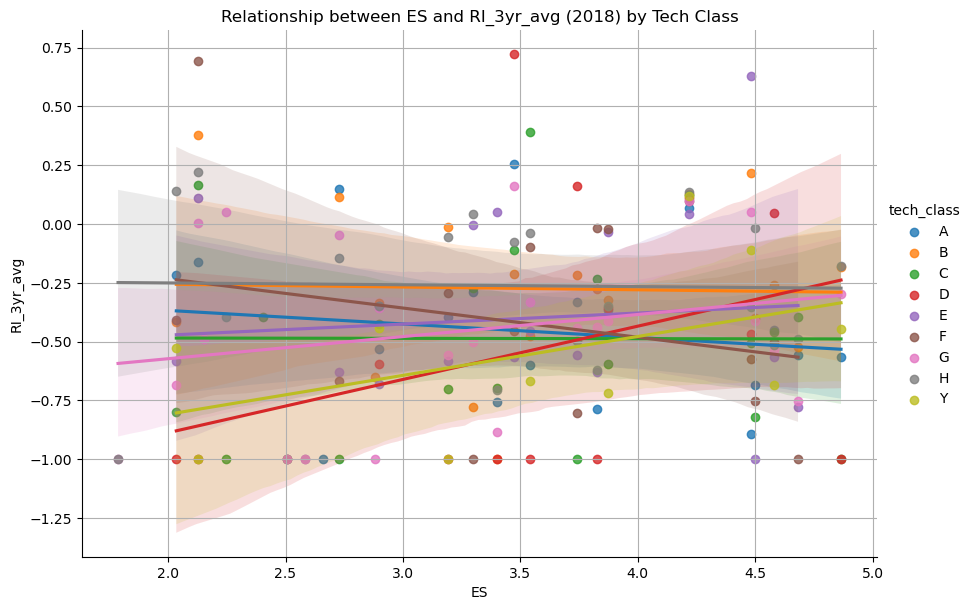

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming crude_balassa_df is already loaded into the environment
# Ensure the 'year' column is treated as a string
crude_balassa_df['year'] = crude_balassa_df['year'].astype(str)

# Filter the dataframe for the year 2018
df_2018 = crude_balassa_df[crude_balassa_df['year'] == '2018']

# Convert 'ES' and 'RI_3yr_avg' to numeric, forcing any errors to NaN
df_2018['ES'] = pd.to_numeric(df_2018['ES'], errors='coerce')
df_2018['RI_3yr_avg'] = pd.to_numeric(df_2018['RI_3yr_avg'], errors='coerce')

# Remove rows with NaN values in 'ES' or 'RI_3yr_avg'
df_2018 = df_2018.dropna(subset=['ES', 'RI_3yr_avg'])

# Plot the relationship between ES and RI_3yr_avg, controlling for tech_class
plt.figure(figsize=(10, 6))
sns.lmplot(x='ES', y='RI_3yr_avg', hue='tech_class', data=df_2018, aspect=1.5, height=6, markers='o')

plt.title('Relationship between ES and RI_3yr_avg (2018) by Tech Class')
plt.xlabel('ES')
plt.ylabel('RI_3yr_avg')
plt.grid(True)
plt.show()


C:\Users\catda\AppData\Local\Temp\ipykernel_10660\2856021866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['ES'] = pd.to_numeric(df_2018['ES'], errors='coerce')
C:\Users\catda\AppData\Local\Temp\ipykernel_10660\2856021866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['RI_3yr_avg'] = pd.to_numeric(df_2018['RI_3yr_avg'], errors='coerce')


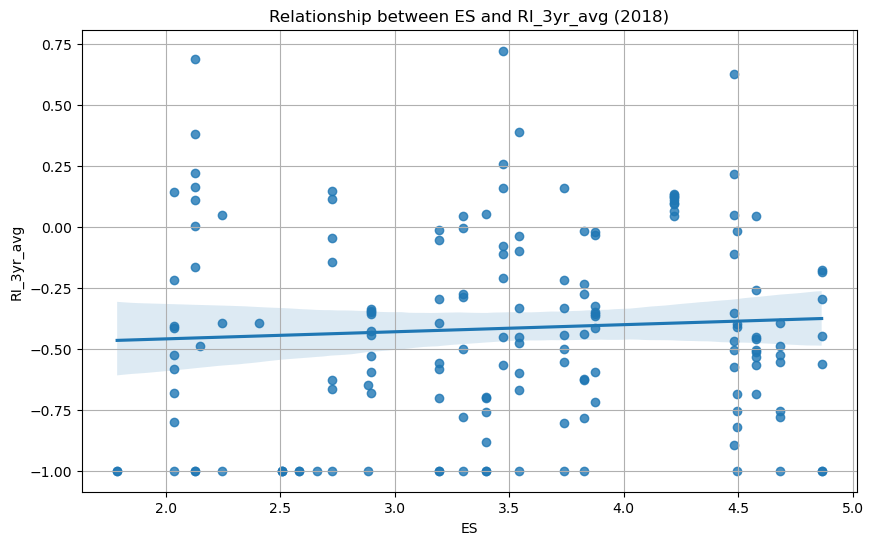

In [36]:
crude_balassa_df['year'] = crude_balassa_df['year'].astype(str)
df_2018 = crude_balassa_df[crude_balassa_df['year'] == '2018']
df_2018['ES'] = pd.to_numeric(df_2018['ES'], errors='coerce')
df_2018['RI_3yr_avg'] = pd.to_numeric(df_2018['RI_3yr_avg'], errors='coerce')
df_2018 = df_2018.dropna(subset=['ES', 'RI_3yr_avg']); plt.figure(figsize=(10, 6))
sns.regplot(x='ES', y='RI_3yr_avg', data=df_2018); plt.title('Relationship between ES and RI_3yr_avg (2018)')
plt.xlabel('ES'); plt.ylabel('RI_3yr_avg'); plt.grid(True); plt.show()


In [33]:
print(df_2018['RI_3yr_avg'].value_counts())

RI_3yr_avg
 0.000000    1360
 0.071839       2
 0.272652       2
 0.384461       2
 0.240969       2
             ... 
 0.619073       1
-0.107960       1
 0.727983       1
 0.234067       1
 0.112740       1
Name: count, Length: 1751, dtype: int64


In [29]:
df_2018 = crude_balassa_df[crude_balassa_df['year'] == '2018']
df_2018

is_radical,country,tech_class,year,non_radical_patents,radical_patents,numerator,denominator,RI,RI_normalized,RI_3yr_avg,VoC,ES
0,AD,B,2018,1,0,0.000000,0.100206,0.000000,-1.000000,-1.000000,other,NA
3,AE,A,2018,1,0,0.000000,0.099978,0.000000,-1.000000,-0.090971,other,NA
6,AE,B,2018,1,0,0.000000,0.100206,0.000000,-1.000000,-1.000000,other,NA
26,AT,A,2018,7,1,0.125000,0.099978,1.250277,0.111220,-0.331078,CME,3.739
31,AT,B,2018,5,1,0.166667,0.100206,1.663242,0.249036,-0.218331,CME,3.739
...,...,...,...,...,...,...,...,...,...,...,...,...
1581,VG,F,2018,1,0,0.000000,0.100183,0.000000,-1.000000,-0.444463,other,NA
1585,VG,G,2018,4,0,0.000000,0.100097,0.000000,-1.000000,-1.000000,other,NA
1590,VG,H,2018,3,0,0.000000,0.100076,0.000000,-1.000000,-0.204748,other,NA
1606,ZA,B,2018,2,0,0.000000,0.100206,0.000000,-1.000000,-1.000000,other,NA


In [30]:
'''regression'''

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

def run_regression_analysis(df):
    # Create a copy of the dataframe to preserve the original
    df_copy = df.copy()

    # Create dummy variables for 'year' and 'tech_class'
    year_dummies = pd.get_dummies(df_copy['year'], prefix='year')
    tech_class_dummies = pd.get_dummies(df_copy['tech_class'], prefix='tech_class')

    # Concatenate these dummies to the main dataframe copy
    df_copy = pd.concat([df_copy, year_dummies, tech_class_dummies], axis=1)

    # Convert 'VoC' to a categorical type if it's not already
    df_copy['VoC'] = pd.Categorical(df_copy['VoC'])

    # Create a unique group identifier for clustering
    df_copy['cluster_group'] = df_copy['country'] + '_' + df_copy['tech_class']

    # Define the formula: Include 'VoC', year dummies, and tech class dummies as independent variables
    independent_vars = ' + '.join(['VoC'] + year_dummies.columns.tolist() + tech_class_dummies.columns.tolist())
    formula = f'RI_3yr_avg ~ {independent_vars}'

    # Fit the regression model with the correct clustering
    model = smf.ols(formula, data=df_copy).fit(cov_type='cluster', cov_kwds={'groups': df_copy['cluster_group']})

    # Print the summary of the model
    return model.summary()

# Call the function with the original dataframe
regression_results = run_regression_analysis(crude_balassa_df)
print(regression_results)


                            OLS Regression Results                            
Dep. Variable:             RI_3yr_avg   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                 1.660e-13
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               1.00
Time:                        16:12:08   Log-Likelihood:                -919.61
No. Observations:                1620   AIC:                             1873.
Df Residuals:                    1603   BIC:                             1965.
Df Model:                          16                                         
Covariance Type:              cluster                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.339e+12 

C:\Users\catda\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\catda\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1883: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


In [31]:
fractional_balassa_df['tech_dummy'] = fractional_balassa_df['tech_class'].str[0] # Create 'tech_dummy' by extracting the first letter from 'tech_class'

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

def run_regression_analysis(df):
    # Create a copy of the dataframe to preserve the original
    df_copy = df.copy()

    # Create dummy variables for 'year' and the new 'tech_dummy'
    year_dummies = pd.get_dummies(df_copy['year'], prefix='year')
    tech_dummy_dummies = pd.get_dummies(df_copy['tech_dummy'], prefix='tech')

    # Concatenate these dummies to the main dataframe copy
    df_copy = pd.concat([df_copy, year_dummies, tech_dummy_dummies], axis=1)

    # Convert 'VoC' to a categorical type if it's not already
    df_copy['VoC'] = pd.Categorical(df_copy['VoC'])

    # Create a unique group identifier for clustering
    df_copy['cluster_group'] = df_copy['country'] + '_' + df_copy['tech_dummy']

    # Define the formula: Include 'VoC', year dummies, and tech_dummy dummies as independent variables
    independent_vars = ' + '.join(['VoC'] + year_dummies.columns.tolist() + tech_dummy_dummies.columns.tolist())
    formula = f'RI_3yr_avg ~ {independent_vars}'

    # Fit the regression model with the correct clustering
    model = smf.ols(formula, data=df_copy).fit(cov_type='cluster', cov_kwds={'groups': df_copy['cluster_group']})

    # Print the summary of the model
    return model.summary()

# Call the function with the original dataframe
regression_results = run_regression_analysis(fractional_balassa_df)
print(regression_results)



                            OLS Regression Results                            
Dep. Variable:             RI_3yr_avg   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                 8.326e-15
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               1.00
Time:                        16:12:23   Log-Likelihood:                 5588.8
No. Observations:               27028   AIC:                        -1.114e+04
Df Residuals:                   27011   BIC:                        -1.100e+04
Df Model:                          16                                         
Covariance Type:              cluster                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5.241e+10        na

C:\Users\catda\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 8
  warnings.warn('covariance of constraints does not have full '
C:\Users\catda\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1883: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


In [ ]:
from scipy.stats import ks_2samp

# Assuming merged_df is already defined and contains 'RI_3yr_avg_frac' and 'RI_3yr_avg_crude'
ks_statistic, p_value = ks_2samp(merged_df['RI_3yr_avg_frac'].dropna(), merged_df['RI_3yr_avg_crude'].dropna())

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare 'tech_class' in crude_balassa_df for merging
crude_balassa_df['tech_dummy'] = crude_balassa_df['tech_class'].str[0]

# Merge the two dataframes
merged_df = pd.merge(fractional_balassa_df, crude_balassa_df, on=['year', 'tech_dummy'], suffixes=('_frac', '_crude'))

# Plotting the correspondence between RI_3yr_avg values
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['RI_3yr_avg_frac'], merged_df['RI_3yr_avg_crude'], alpha=0.5)
plt.title('Correspondence between RI_3yr_avg Variables')
plt.xlabel('RI_3yr_avg from Fractional Data')
plt.ylabel('RI_3yr_avg from Crude Data')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = merged_df['RI_3yr_avg_frac'].corr(merged_df['RI_3yr_avg_crude'])
print(f"Correlation coefficient between RI_3yr_avg variables: {correlation}")

# Optionally, explore a simple linear regression analysis
import statsmodels.api as sm
X = sm.add_constant(merged_df['RI_3yr_avg_frac'])  # adding a constant
model = sm.OLS(merged_df['RI_3yr_avg_crude'], X).fit()
print(model.summary())


In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

def run_regression_analysis(df):
    # Create a copy of the dataframe to preserve the original
    df_copy = df.copy()

    # Create dummy variables for 'year' and 'tech_class'
    year_dummies = pd.get_dummies(df_copy['year'], prefix='year')
    tech_class_dummies = pd.get_dummies(df_copy['tech_class'], prefix='tech_class')

    # Concatenate these dummies to the main dataframe copy
    df_copy = pd.concat([df_copy, year_dummies, tech_class_dummies], axis=1)

    # Convert 'VoC' to a categorical type if it's not already
    df_copy['VoC'] = pd.Categorical(df_copy['VoC'])

    # Create a unique group identifier for clustering
    df_copy['cluster_group'] = df_copy['country'] + '_' + df_copy['tech_class']

    # Define the formula: Include 'VoC', year dummies, and tech class dummies as independent variables
    independent_vars = ' + '.join(['VoC'] + year_dummies.columns.tolist() + tech_class_dummies.columns.tolist())
    formula = f'RI_3yr_avg ~ {independent_vars}'

    # Fit the regression model with the correct clustering
    model = smf.ols(formula, data=df_copy).fit(cov_type='cluster', cov_kwds={'groups': df_copy['cluster_group']})

    # Print the summary of the model
    return model.summary()

# Call the function with the original dataframe
regression_results = run_regression_analysis(crude_balassa_df)
print(regression_results)


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'fractional_balassa_df' already has 'year' and 'sector' as separate columns

# Create dummies for 'VoC', 'year', and 'sector'
VoC_dummies = pd.get_dummies(fractional_balassa_df['VoC'], drop_first=True)
year_dummies = pd.get_dummies(fractional_balassa_df['year'], prefix='year', drop_first=True)
sector_dummies = pd.get_dummies(fractional_balassa_df['tech_class'], prefix='tech_class', drop_first=True)

# Drop the original columns and concatenate the dummies
fractional_balassa_df = pd.concat([
    fractional_balassa_df.drop(['VoC', 'year', 'tech_class'], axis=1),
    VoC_dummies,
    year_dummies,
    sector_dummies
], axis=1)

# Define the dependent and independent variables
y = fractional_balassa_df['RI_3yr_avg']
X = fractional_balassa_df.drop(['RI_3yr_avg'], axis=1)

# Add a constant to the model (important for including the intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'fractional_balassa_df' is your DataFrame
# Convert 'tech_class' and 'year' to categorical if they are not already
fractional_balassa_df['tech_class'] = fractional_balassa_df['tech_class'].astype('category')
fractional_balassa_df['year'] = fractional_balassa_df['year'].astype('category')

# Get dummies for 'VoC', 'tech_class', and 'year'
# 'drop_first=True' to avoid the dummy variable trap by dropping the first category
df_with_dummies = pd.get_dummies(fractional_balassa_df, columns=['VoC', 'tech_class', 'year'], drop_first=True)

# Drop the 'country' column as it is not needed for the regression
df_with_dummies.drop('country', axis=1, inplace=True)

# Convert boolean columns (result of get_dummies) to int
for col in df_with_dummies.columns[df_with_dummies.dtypes == 'bool']:
    df_with_dummies[col] = df_with_dummies[col].astype(int)

# Define your independent variables (X) and dependent variable (y)
# Assuming you want to use 'RI_3yr_avg' as the dependent variable
X = df_with_dummies.drop(['non_radical_contributions', 'radical_contributions', 'RI', 'RI_normalized', 'RI_3yr_avg'], axis=1)
y = df_with_dummies['RI_3yr_avg']

# Add a constant term to the predictor
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print out the statistics
model_summary = model.summary()
print(model_summary)


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Convert 'tech_class' and 'year' to categorical if they are not already
fractional_balassa_df['tech_class'] = fractional_balassa_df['tech_class'].astype('category')
fractional_balassa_df['year'] = fractional_balassa_df['year'].astype('category')

# Get dummies for 'VoC', 'tech_class', and 'year'
# 'drop_first=True' to avoid the dummy variable trap by dropping the first category
df_with_dummies = pd.get_dummies(fractional_balassa_df, columns=['VoC', 'tech_class', 'year'], drop_first=True)

# Define the model with clustering by country-sector
model = sm.OLS(y, X)

# Fit the model with clustered standard errors
results = model.fit(cov_type='cluster', cov_kwds={'groups': df_with_dummies['country'] + "_" + df_with_dummies['tech_class']})

# Print the summary with standard errors
print(results.summary())

In [ ]:
fractional_balassa_df[1:3]

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'fractional_balassa_df' is your DataFrame
fractional_balassa_df['year'] = fractional_balassa_df['year'].astype('category')
fractional_balassa_df['tech_class'] = fractional_balassa_df['tech_class'].astype('category')

# Create a cluster group before dummy encoding
fractional_balassa_df['cluster_group'] = fractional_balassa_df['country'] + "_" + fractional_balassa_df['tech_class'].cat.codes.astype(str)

# Now convert 'VoC', 'tech_class', and 'year' into categorical dummy variables
df_with_dummies = pd.get_dummies(fractional_balassa_df, columns=['VoC', 'tech_class', 'year'], drop_first=True)

# Define independent variables (X) and dependent variable (y)
y = df_with_dummies['RI_normalized'].astype(float)  # Ensuring it is float
X = df_with_dummies.drop(['country', 'non_radical_contributions', 'radical_contributions', 'RI', 'RI_normalized', 'RI_3yr_avg', 'cluster_group'], axis=1, errors='ignore')
X = sm.add_constant(X)  # Add a constant to the model

# Fit the OLS model with clustered standard errors using the 'cluster_group'
try:
    model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df_with_dummies['cluster_group']})
    print(model.summary())
except Exception as e:
    print(f"An error occurred: {e}")



In [ ]:
# Convert 'country' and 'tech_class' to string before creating the cluster group
fractional_balassa_df['cluster_group'] = fractional_balassa_df['country'].astype(str) + "_" + fractional_balassa_df['tech_class'].astype(str)

# Proceed with creating dummy variables
df_with_dummies = pd.get_dummies(fractional_balassa_df, columns=['VoC', 'tech_class', 'year'], drop_first=True)

# Ensure the dependent variable and other model variables are in the correct format
df_with_dummies['RI_normalized'] = pd.to_numeric(df_with_dummies['RI_normalized'], errors='coerce')

# Drop columns that are not needed for the regression and might cause errors
X = df_with_dummies.drop(['country', 'non_radical_contributions', 'radical_contributions', 'RI', 'RI_normalized', 'RI_3yr_avg', 'cluster_group'], axis=1, errors='ignore')
X = sm.add_constant(X)

# Fill NaN values which might be introduced by conversions
X.fillna(0, inplace=True)
y = df_with_dummies['RI_normalized'].fillna(0)

# Fit the OLS model with clustered standard errors
try:
    model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df_with_dummies['cluster_group']})
    print(model.summary())
except Exception as e:
    print(f"An error occurred: {e}")




In [ ]:



finaldf['assignee_inst']= finaldf['assignee_country'].map(inst_dict).fillna("other")
finaldf['inventor_inst']= finaldf['inventor_country'].map(inst_dict).fillna("other")

<h3>Using Fractional Counts to Calculate a Balassa Index of Innovation Advantage</h3>

Fractional counts accommodate patents that may be associated with multiple countries and/or technological classes. The approach proportionally distributes each patent's contribution across its associated categories.

Let:
- $f^*_{ijt}$ represent the fractional count of radical patents for country $i$ in technology class $j$ at time $t$, calculated as the sum of the product of country and class contributions for radical patents.
- $f_{ijt}$ represent the fractional count of non-radical patents for the same parameters, calculated similarly.

These fractional counts are derived from expanding dictionary data within each patent record, which specify the contributions of each patent to various countries and CPC classes.

When using fractional counts for country and CPC class, the formula for the Radicality Index (RI) remains the same. The notation simply reflects the fractional nature of the counts. The Radicality Index effectively utilizes fractional counts to accommodate patents that may be associated with multiple countries or technological classes. 

$$
\large RI_{ijt} = \frac{\frac{f^*_{ijt}}{f_{ijt} + f^*_{ijt}}}{\sum_{i=1}^{n} \frac{f^*_{ijt}}{f_{ijt} + f^*_{ijt}}}
$$

The numerator calculates the proportion of radical patents, weighted by their fractional count, to the total patents (both radical and non-radical, each weighted by their fractional count) for each country in a specific sector and year.

The denominator aggregates these ratios over all countries for sector $j$ at time $t$.


In [ ]:
import pandas as pd

def expand_dict_rows(df, col_name):
    """ Normalize dictionary columns and expand them into rows. """
    rows = []
    for index, row in df.iterrows():
        dict_data = row[col_name]
        if isinstance(dict_data, str):
            dict_data = ast.literal_eval(dict_data)  # Safely evaluate string literal to dictionary
        if isinstance(dict_data, dict):
            for key, value in dict_data.items():
                new_row = row.to_dict()
                new_row['key'] = key
                new_row['value'] = value
                rows.append(new_row)
    return pd.DataFrame(rows)

def calculate_fractional_index(df):
    if 'is_radical' not in df.columns or 'year' not in df.columns:
        raise ValueError("DataFrame does not contain necessary columns ('is_radical' or 'year').")

    country_frac = expand_dict_rows(df, 'inventors_country_frac')
    class_frac = expand_dict_rows(df, 'frac_class')

    merged_df = pd.merge(country_frac, class_frac, on=['patent', 'is_radical', 'year'], suffixes=('_country', '_class'))
    merged_df['weighted_is_radical'] = merged_df['value_country'] * merged_df['value_class'] * merged_df['is_radical'].astype(int)
    merged_df['weighted_total'] = merged_df['value_country'] * merged_df['value_class']

    # Convert 'value_country' and 'value_class' to numeric if not already
    merged_df['value_country'] = pd.to_numeric(merged_df['value_country'], errors='coerce')
    merged_df['value_class'] = pd.to_numeric(merged_df['value_class'], errors='coerce')

    grouped = merged_df.groupby(['key_country', 'key_class', 'year']).agg({
        'weighted_is_radical': 'sum',
        'weighted_total': 'sum'
    }).reset_index()

    # Calculate the index based on weighted radical and total patents
    grouped['radicality_index'] = grouped['weighted_is_radical'] / grouped['weighted_total']

    # Normalize the radicality index using the specified formula
    grouped['radicality_index_normalized'] = (grouped['radicality_index'] - 1) / (grouped['radicality_index'] + 1)

    return grouped

# Assuming df is your DataFrame containing the patent data
result_df = calculate_fractional_index(df)
print(result_df)


In [ ]:
def expand_dict_rows(df, col_name):
    """ Helper function to normalize dictionary columns and expand them into rows. """
    rows = []
    for i, data in df.iterrows():
        # Convert string to dictionary if necessary
        dict_data = data[col_name]
        if isinstance(dict_data, str):
            try:
                dict_data = ast.literal_eval(dict_data)
            except ValueError:
                continue  # skip rows where the dictionary is malformed

        # proceed if dict_data is a dictionary
        if isinstance(dict_data, dict):
            for key, value in dict_data.items():
                new_data = data.to_dict()
                new_data['key'] = key
                new_data['value'] = value
                rows.append(new_data)
    new_df = pd.DataFrame(rows)
    return new_df

def calculate_fractional_index(df):
    if 'is_radical' not in df.columns or 'year' not in df.columns:
        raise ValueError("DataFrame does not contain necessary columns ('is_radical' or 'year').")

    # include 'year' in the selection
    country_frac = expand_dict_rows(df[['patent', 'is_radical', 'year', 'inventors_country_frac']], 'inventors_country_frac')
    class_frac = expand_dict_rows(df[['patent', 'is_radical', 'year', 'frac_class']], 'frac_class')

    # merge expanded frames on patent, is_radical, and year to align country fractions with class fractions
    merged_df = pd.merge(country_frac, class_frac, on=['patent', 'is_radical', 'year'], suffixes=('_country', '_class'))

    # calculate the product of country and class fractions as the weight for each patent
    merged_df['weighted_is_radical'] = merged_df['value_country'] * merged_df['value_class'] * merged_df['is_radical'].astype(int)
    merged_df['weighted_total'] = merged_df['value_country'] * merged_df['value_class']

    # group by country, class, and year to aggregate the weighted counts
    grouped = merged_df.groupby(['key_country', 'key_class', 'year'])
    sum_data = grouped.agg({
        'weighted_is_radical': 'sum',
        'weighted_total': 'sum'
    })

    # calculate the index based on weighted radical and total patents
    sum_data['radicality_index'] = sum_data['weighted_is_radical'] / sum_data['weighted_total']

    # normalize the radicality index
    sum_data['radicality_index_normalized'] = (sum_data['radicality_index'] - 1) / (sum_data['radicality_index'] + 1)

    return sum_data.reset_index()

result_df = calculate_fractional_index(df)
print(result_df)
